In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Potential flow around a cylinder

2D flow in a plane around a cylinder. Full setup for the problem is nicely explained here: https://en.wikipedia.org/wiki/Potential_flow_around_a_circular_cylinder

Mathematical derivation for the exact solution can be found here: https://courses.seas.harvard.edu/climate/eli/Courses/APM105/Sources/08-PDEs/03-Laplace/notes-potential-flow-around-cylinder.pdf

The exact solution is usually calculated using cylindrical coordinates. 
We make a few assumptions: 
- The flow has no vorticity and the liquid is assumed to be incompressible.
- Far away from the cylinder, the flow is uniform with magnitude U. 
- The cylinder has radius R. 

We will skip straight to the solution, which is governed by the following equation. The equation is phrased in terms of the 
velocity potential $\phi$, which can differentiated to find the Velocity components in the $r$ and $\theta$ directions. I have copied the below code for the analytical solution from: http://flothesof.github.io/2D-potential-flow-finite-differences.html


$$\phi (r,\theta )=Ur\left(1+{\frac {R^{2}}{r^{2}}}\right)\cos \theta \,.$$
$$V_{r}={\frac {\partial \phi }{\partial r}}=U\left(1-{\frac {R^{2}}{r^{2}}}\right)\cos \theta $$
$$ V_{\theta }={\frac {1}{r}}{\frac {\partial \phi }{\partial \theta }}=-U\left(1+{\frac {R^{2}}{r^{2}}}\right)\sin \theta \,.$$

In [11]:
def make_grid(Lx=4, Ly=5, nx=50, ny=51):
    """Make a rectangular grid, with coordinates centered on (0, 0)."""
    x = np.linspace(0, Lx, num=nx) - Lx/2
    y = np.linspace(0, Ly, num=ny) - Ly/2
    X, Y = np.meshgrid(x, y)
    return X, Y

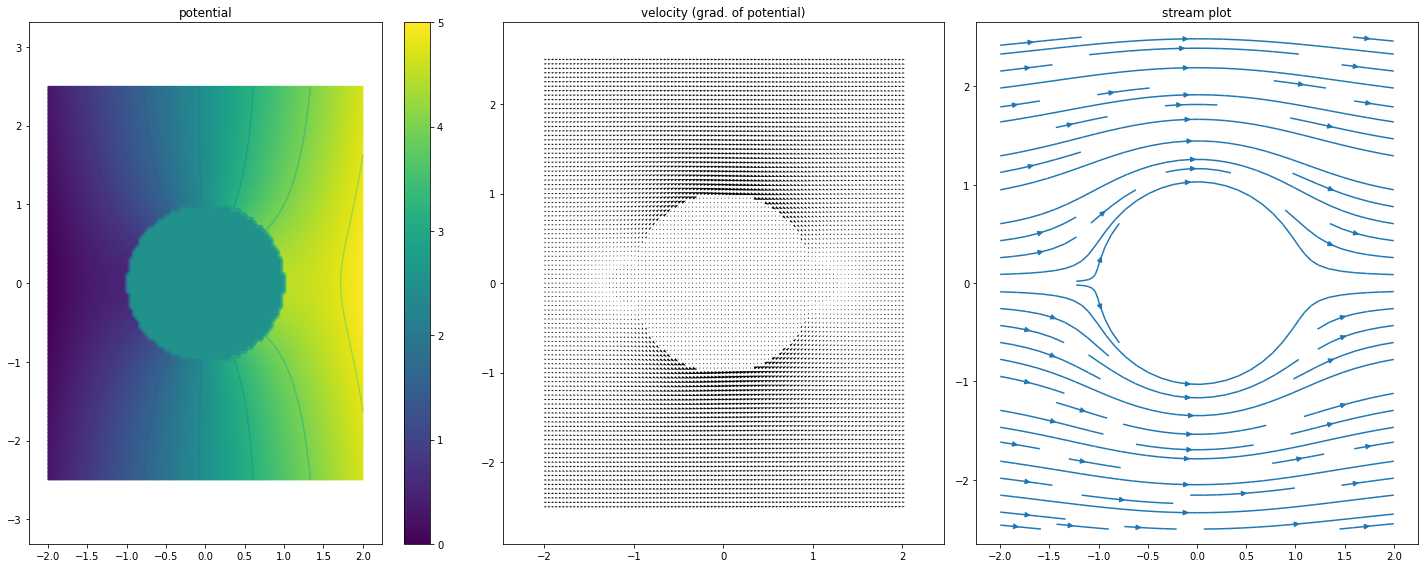

In [15]:
def compute_analytical_solution(grid, U, R):
    """Applies analytical solution of cylinder flow to every point in the grid."""
    X, Y = grid
    r = np.sqrt(X**2 + Y**2)
    theta = np.arctan2(Y, X)
    phi = U * r * (1 + R**2/r**2) * np.cos(theta) * (r > R)
    phi -= phi.min() # normalizing by minimum value
    v_r = U * (1 - R**2 / r**2) * np.cos(theta) * (r > R)
    v_theta = -U * (1 + R**2 / r**2) * np.sin(theta) * (r > R)
    v_x = np.cos(theta) * v_r - np.sin(theta) * v_theta
    v_y = np.sin(theta) * v_r + np.cos(theta) * v_theta

    return phi, v_x, v_y

def compute_gradient(grid, phi):
    """Numerically computes velocity as gradient of phi on grid."""
    X, Y = grid
    dx = X[0, 1] - X[0, 0]
    dy = Y[1, 0] - Y[0, 0]
    v, u = np.gradient(phi, dx, dy)
    return u, v

def make_plot(phi_mapped, grid, uv=None):
    """Plots a solution to the potential flow on the grid."""
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 8))
    m = ax1.pcolormesh(grid[0], grid[1], phi_mapped, shading='Gouraud')
    ax1.contour(grid[0], grid[1], phi_mapped)
    plt.colorbar(m, ax=ax1)
    ax1.axis('equal')
    ax1.set_title("potential")
    
    if uv is not None:
        u, v = uv
    else:
        u, v = compute_gradient(grid, phi_mapped)

    ax2.quiver(grid[0], grid[1], u, v)
    ax2.set_title("velocity (grad. of potential)");
    ax2.axis('equal')
    ax3.streamplot(grid[0], grid[1], u, v)
    ax3.set_title('stream plot')
    ax3.axis('equal')
    plt.tight_layout()

grid = make_grid(nx=100, ny=101)
phi_exact, v_x_exact, v_y_exact = compute_analytical_solution(grid, 1, 1)

make_plot(phi_exact, grid, uv=(v_x_exact, v_y_exact))